In [24]:
# library
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score

In [2]:
from google.colab import files
myfile = files.upload()

Saving train_data_lda.csv to train_data_lda.csv


In [26]:
import io
import pandas as pd

train_data = pd.read_csv(io.BytesIO(myfile['train_data_lda.csv']))
train_data.tail()

,Unnamed: 0,row_num,location,cafe_name,review,label,new_review,preprocessed,category
23519,33713,34483,한남동,모모,바닐라 라떼 / 모모 라떼,4,"바닐라/Noun,라테/Noun,모모/Noun,라테/Noun",바닐라 라테 모모 라테,unlabeled
23520,33715,34485,한남동,모모,우리는 결국 모두 어떤 기대 없이 하도록 돼 있는 일을 하게 된다. 그래서 이 곳은...,5,"우리/Noun,결국/Adverb,모두/Noun,어떻다/Adjective,기대/Nou...",우리 모두 어떻다 기대 있다 일 곳 점 헤헤,unlabeled
23521,33716,34486,한남동,모모,가격도 합리적이고 분위기두 굿!,5,"가격/Noun,합리/Noun,분위기/Noun,후/Noun,굿/Noun",가격 합리 분위기 후 굿,unlabeled
23522,33717,34487,한남동,모모,조용한 골목에 있어서 일단 너무 좋아요. 분위기도 예쁘고. 여긴 독특하게 시간당으로...,4,"조용하다/Adjective,골목/Noun,있다/Adjective,일단/Noun,너무...",조용하다 골목 있다 일단 좋다 분위기 예쁘다 독특하다 시간 계산 계산기 편 아니다 ...,unlabeled
23523,33718,34488,한남동,모모,- 심플한 사인에 보게 되었다가 실내의 조명 디테일에 반함 . 오래 있고 싶은 카...,4,"심플/Noun,사인/Noun,보다/Verb,되어다/Verb,실내/Noun,조명/No...",심플 사인 실내 조명 디테일 반함 있다 카페 아메리카노 잔 느낌 좋다 디테일 있다 ...,unlabeled


In [27]:
train_data_array= train_data["preprocessed"]

In [28]:
train_data_array

0        그냥 그렇다 생각 다른 곳 넛 킹 드 이유 있다 그냥 갤러리아 지하 게 갑자기 확장...
1                                     우유 크림 개 맛있다 혼잡하다 또 곳
2        도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 ...
3                             도넛 맛 있다 진짜 엉 어어 무길 예약 거 절대 못
4        바닐라 맛 맛있다 도 넛 분 거 같다 이 왕관 김 조각 케이크 사고 살라 다시 줄 ...
                               ...                        
23519                                         바닐라 라테 모모 라테
23520                             우리 모두 어떻다 기대 있다 일 곳 점 헤헤
23521                                        가격 합리 분위기 후 굿
23522    조용하다 골목 있다 일단 좋다 분위기 예쁘다 독특하다 시간 계산 계산기 편 아니다 ...
23523    심플 사인 실내 조명 디테일 반함 있다 카페 아메리카노 잔 느낌 좋다 디테일 있다 ...
Name: preprocessed, Length: 23524, dtype: object

In [6]:
import numpy as np

train_data_array = np.array(train_data_array)

In [29]:
train_data_array

0        그냥 그렇다 생각 다른 곳 넛 킹 드 이유 있다 그냥 갤러리아 지하 게 갑자기 확장...
1                                     우유 크림 개 맛있다 혼잡하다 또 곳
2        도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 ...
3                             도넛 맛 있다 진짜 엉 어어 무길 예약 거 절대 못
4        바닐라 맛 맛있다 도 넛 분 거 같다 이 왕관 김 조각 케이크 사고 살라 다시 줄 ...
                               ...                        
23519                                         바닐라 라테 모모 라테
23520                             우리 모두 어떻다 기대 있다 일 곳 점 헤헤
23521                                        가격 합리 분위기 후 굿
23522    조용하다 골목 있다 일단 좋다 분위기 예쁘다 독특하다 시간 계산 계산기 편 아니다 ...
23523    심플 사인 실내 조명 디테일 반함 있다 카페 아메리카노 잔 느낌 좋다 디테일 있다 ...
Name: preprocessed, Length: 23524, dtype: object

In [30]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data_array)

In [31]:
X

<23524x11806 sparse matrix of type '<class 'numpy.float64'>'
	with 218052 stored elements in Compressed Sparse Row format>

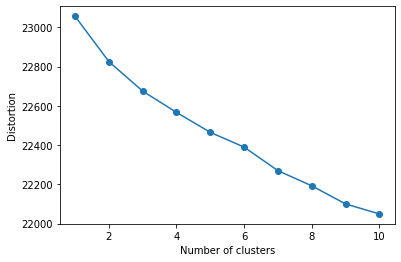

In [32]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

# plot - 급격하게 줄어드는 부분
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [57]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=100)
# n_init은 초기 중앙점이 무작위로 선택되기에 가장 나은 결과를 얻기 위해 몇 번 초기값을 변경하여 알고리즘을 실시할 지를 정하는 것이다. 간단하게 표현하면 초기중심점 선택의 반복 횟수 알고리즘.
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [59]:
model.labels_

array([0, 2, 0, ..., 1, 1, 0], dtype=int32)

In [60]:
[x for x, y in zip(train_data_array, model.labels_) if  y == 0]

['그냥 그렇다 생각 다른 곳 넛 킹 드 이유 있다 그냥 갤러리아 지하 게 갑자기 확장 이전 웨이 팅 뭐',
 '도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 느리다 이해 좀 안',
 '도넛 맛 있다 진짜 엉 어어 무길 예약 거 절대 못',
 '바닐라 맛 맛있다 도 넛 분 거 같다 이 왕관 김 조각 케이크 사고 살라 다시 줄 못 사서 아쉽다 이 점 개선 꼭 부탁드리다',
 '도넛 맛 맛있다 대신 포장 거 인내심 가야 함 뭔가 포장 방식 거 같다',
 '계산 직원 불친절하다 프로도 두 개시 집 어보 개 안 예정 이다',
 '아쉽다 처음 노 티스 알 때 설레다 감동 순간 안 입 물 눈 진짜 빵 다르다 수 있다 그땐 돈 없다 개 못 지금 살 수 있다 감동 맛 없다 몇 번 혹시 혹시 대감 처음 그 맛 수가 없다 또 사',
 '당 때 꼭',
 '줄 길다 맛',
 '낮 사서 바로 때 맛 저녁 빵 딱딱하다 감흥 없다 카야 버터 벼로 이다 디다',
 '커스터드 크림 진해 명란 빵 별로 빵 자체 맛있다',
 '좀 더 맛있다 던킨 도넛 이즈 버터 도넛 밍밍 데 묘 맛 남 스마일 케이크 촉촉 부드럽다 맛 남 토요일 시 기준 분 상 대기',
 '우유 생크림 인테리어 이사 고 나선 감성 조금 좌석 굿',
 '궁금하다 번 볼 만',
 '스마일 스티커 움 도넛 시장 꽈배기 맛',
 '천 원 더 싱글 오리진 어떻다 이렇다 커피 주인 아니다 알바 분 수도 없다 도넛 사악하다 가격 생각 기대 이하 정말 맛없다 기도 힘드다 커피 로 태도 리뷰',
 '특별하다 게 없다 줄 우유 크림 예술 빵 예술 또',
 '도넛 맛 좋다 유명하다 가게 콘셉트 좋다 유명하다 곳 엇네 안 궁금하다 테 번 방문 볼 만 가게 이다',
 '플랫 화이트 라테 옴',
 '맛 없다 건 아니다 그냥 일반 꽈배기 크림 있다 맛',
 '도넛 보통 이요 커피 맛있다 층 날 파리 많다 불편하다 주문 곳 두 곳 영어 필기체 힘들다 한참 다른 줄 가라',
 '번 만 카페 작 야외 석도 있다 좋다',
 

In [61]:
[x for x, y in zip(train_data_array, model.labels_) if  y == 1]

['안 진짜 더 좋다 거 같다 줄 정리 빨 좋다',
 '도넛 맛있다 분위기 좋다 용동 자주 굳이 멀리 건 아니다 그냥 동네 카페 자주 가기 최고 요',
 '그냥 테이크아웃 좋다',
 '층층 분위기 달라 좋다 층 시끄럽다 층 왼쪽 쭉 실내 실외 느낌 무언가 때 재미있다 조명 크게 어둡다 적당하다 좋다 천장 높다 답답하다 좋다 뮤직 사운드 조금',
 '분위기 좋다 완전 감성 카페 전 거울 샷찍 수 있다 곳',
 '예쁘다 분위기 좋다 진짜 커피 별로 내 커피 이 확인',
 '별 맛 좋다',
 '분위기 좋다 인근 데 사람 많다 좀 더 넓다 좋다',
 '가격 생각 분위기 좋다 카페 아르바이트생 친절하다 심',
 '보통 이 폐 공장 같다 분위기 널찍하다 공부 좋다',
 '장소 좋다 카페 커피 맛없다',
 '분위기 좋다 비싸다 맛 보통',
 '분위기 빨 빙수 맛있다 가끔 분위기 때 맛 가격 살짝 아쉽다',
 '카페 분위기 좋다 맛있다 직원 친절하다 또',
 '분위기 다인 곳',
 '분위기 좋다 카페',
 '분위기 정말 좋다 또 거임',
 '음 분위기 좋다',
 '카페 발레 가능 분위기 좋다 착하다 가격 솜사탕 아포 또',
 '착하다 가격 분위기 괜찮다',
 '분위기 좋다 카페 스파게티',
 '디저트 종류 많다 좋다',
 '취향 좀 것 같다 저 좋다',
 '커피 맛있다 분위기 좋다',
 '자리 매우 협소하 분위기 좋다 준 블렌딩 맛 다소 아쉽다',
 '여기 커피 좋다',
 '분위기 맛 최고 공간 넓다 아주 좋다',
 '케이크 쿠키 정말 고급 진 맛 케이크 그 맛 집 답 퀄리티 굿 분위기 좋다 인생 샷 또 방문 카페 이다',
 '아메리카노 제 취향 아니다 다른 음료 달달 맛있다 분위기 좋다 공간 넓다 좋다',
 '압구정 테라스 있다 카페 중 최고 곳 요 음식 일반 다른 브런치 카페 맛있다 분위기 좋다',
 '분위기 정말 좋다 노래 재즈 노래 전 다른 브런치 카페 빅뱅 노래 짜증 가격 분위기 위치 등 비 비싸다 안 양은 좀 저희 양 편 개시',
 '한적하다 골목 있다 분위기 좋

In [62]:
[x for x, y in zip(train_data_array, model.labels_) if  y == 2]

['우유 크림 개 맛있다 혼잡하다 또 곳',
 '빵 더 맛있다 저렴하다 데 매장 분위기 좋다 직원 끼리 좀 소통 안 느낌 아쉽다 계산 때 빵 케이크 미리 말씀',
 '노 티스 맛있다',
 '느끼하다 막 달리 난 맛있다 뎅 개취 듯 커피 무난 함',
 '맛있다 줄 길 어짐 음료 그다지',
 '맛있다 던킨 도넛 그 말',
 '맛있다 단 건 담 사람 조오오 많다',
 '친구 존 맛 맛있다',
 '정도 아니다 서울숲 쪽 도넛 더 맛있다',
 '정도 아니다 맛있다 아주',
 '맛있다 둥 살 때문 하나 여',
 '생크림 드 맛있다',
 '맛있다 느낌 안 알쏭달쏭하다 다음 다시 사 포장 가족',
 '상담 사 맛있다 자꾸 맛',
 '맛있다 집 때 또 포장',
 '인기 많다 넓다 루 이 더 요 종류 별로 도넛 맛있다 사람 많다 게 흠 듯',
 '또 포장 모 맛있다',
 '우유 생크림 맛있다 카야 베리 맛 맛있다 베리 상큼 평점 기분',
 '여기 도넛 던킨 이렇다 거 달라 하나 안 느끼하다 진짜 맛있다',
 '우유 생크림 도넛 맛있다 줄 서서 정돈 아니다',
 '진짜 크루아상 진짜 맛있다 약간 오설록 맛 제조 맛',
 '크림 빵 크림 달 맛있다',
 '동생 맛있다 대서 응 이 정말 맛있다 건가 안 크림 느끼하다 별로 종류 별로 별로 데 산 공원 여기 빵 비닐 마케팅 승리',
 '주말 먹기 어려움 도넛 포함 모든 디저트 맛있다 가게',
 '맛있다 일단 단도 노츠 생각 안 마 일드 맛 맛있다 맛 있다',
 '도넛 맛있다 빵 딱하다 눈 게 없다 버터 도넛 맛있다',
 '사람 많다 맛있다 인테리어 패키지 디자인 예쁘다 종종 카페',
 '맛있다 인테리어 예쁘다 맛있다 안 직접 모습 볼 수 있다 좋다 사람 많다 회전 빠르다',
 '밀크 치즈케이크 아메리카노 도넛 류 다양하다 케이크 예쁘다 맛있다 웨이팅 길다 발레 제한 시간 시간 반',
 '밀크 치즈 딜 라이트 케이크 맛있다 아아 신맛 고요 케이크 가격 대가 좀 비싸다 편 얼 그레이 이드 마셧는 데 괜찮다',
 '생 과일 주스 맛있다 디저

In [63]:
[x for x, y in zip(train_data_array, model.labels_) if  y == 3]

['황 치즈 아니다 두 번',
 '치즈 빙수 치즈 총 종류 있다 중 치즈 빙수 안 색깔 하얗다 식 우유 정말 부드럽다 입 살살',
 '치즈 좋아하다 사람 꼭 치즈 빙수 드 세 여우 이 얼음 치즈 더 많다',
 '신촌 점심 리 코타 치즈 샐러드 맛있다',
 '리 코타 치즈 샐러드 굳다',
 '리 코타 치즈 샐러드 파니니 사진 없다 샹 리아 마이 쪙',
 '리 코타 치즈 샐러드 리 코타 치즈 직접 좋다 식 부드럽다 꿀 레몬 향기 성비 프랜차이즈 매장 넘사벽',
 '사장 진짜 친절하다 맛있다 리 코타 치즈 팬케이크 꼭',
 '길다 기다림 시간 보상 맛 리 코타 치즈 팬케이크',
 '맛있다 그릭 요구르트 리 코타 치즈 더 해 과 일 샐러드 기분 코로나 사태 때문 테이크아웃 안 이용 참고',
 '양도 울 치즈 맛',
 '샐러드 맛집 사진 샐러드 원',
 '가게 내부 예쁘다 한참 구경 직원 친절하다 음식 아주 맛있다 리 코타 치즈 샐러드 해산물 토마토 리소토 추천',
 '리 코타 치즈 샐러드 리 코타 치즈 양 많다 만족하다 리 코타 치즈 제외 다른 구성은 별로 막 풍부하다 가격 비싸다 것 같다 아쉽다',
 '여전하다 맛있다 리 코타 치즈 샐러드 파니니',
 '리 코타 치즈 샐러드 모차렐라 토마토 파니니 로열 밀크 티',
 '청계천 산책 후리 코타 치즈 샐러드 모차렐라 토마토 파니니 청포도 주스 잔',
 '리 코타 치즈 샐러드 파니니',
 '처음 때 아니다 마 마스 샐러드 파니니 굿',
 '리 코타 치즈 샐러드 좋다',
 '리 코타 치즈 샐러드 빵리필 청포도 주스',
 '마 마스 리 코타 치즈 샐러드 연어 샌드위치 청포도 주스 리 코타 치즈 많다 빵 번 리필 못',
 '맛있다 리 코타 치즈 샐러드',
 '청포도 주스 연어 샐러드 리 코타 치즈 샐러드 정말',
 '아사 진 보 침샘 택 리 코타 치즈 샐러드 놈 음 진리 청포도 주스',
 '완소 리 코타 치즈 샐러드 불고기 지라니 아이 티킷',
 '청계천 점 공간 여유 있다 리 코타 치즈 샐러드 여전하다 맛',
 '맛 파니니 

In [64]:
A = vectorizer.transform(["카페 분위기가 좋네요"])
prediction = model.predict(A)
print(prediction)

[0]


In [65]:
B = vectorizer.transform(["알바생 불친절"])
prediction = model.predict(B)
print(prediction)

[0]


In [66]:
C = vectorizer.transform(["내부 인테리어가 좋음"])
prediction = model.predict(C)
print(prediction)

[0]


In [67]:
D = vectorizer.transform(["커피 맛이 좋음"])
prediction = model.predict(D)
print(prediction)

[2]


In [68]:
E = vectorizer.transform(["디저트 맛이 좋음"])
prediction = model.predict(E)
print(prediction)

[0]
